---

## Fifteen Years of Women's Tennis

The final assignment asks you to use the computational thinking and programming skills you learned in the course to answer an empirical social science question. You are expected to apply the best practices and theoretical concepts we covered in the course to produce a program that not only returns the correct output but is also legible, modular, and reasonably optimized. The assignment assumes mastery of loops, conditionals, and functions, as well as awareness of issues related to runtime performance.

In honor of Emma Raducanu's historical achievements this year, we will study the results of womens' tennis matches over the period 2007-2021. Your objectives are to parse the data, reconstruct tournament brackets, identify the top players, and implement an algorithm to provide an alternative ranking for the players.

**NOTE: You are only allowed to use fundamental Python data types (lists, tuples, dictionaries, numpy.ndarray, etc.) to complete this assignment.** You are not allowed to use advanced data querying and data analysis packages such as pandas, sqlite, networkx, or similar. We impose this restriction in order to test your grasp of fundamental programming concepts, not your scripting experience with Python libraries you acquired from prior work or other courses. 

#### Hints

Although this assignment is quite streamlined, imagine that the tasks here are part of a larger project. How would you structure your program if in the future you may need to use a different dataset with similar structure, manipulate the data somewhat differently, add additional analyses, or modify the focus of the current analysis?  

Keep different data manipulations in separate functions/methods and group related functions/classes in separate `.py` files. Name your modules in an informative way.

Using an object-oriented approach to solve the problems is entirely optional and you will not obtain bonus points for this. If you are not confident in your programming skills, we recommend developing your solution with functions only.

### Data

You will find the data in the repository [https://github.com/lse-my470/assignment-final-data.git](https://github.com/lse-my470/assignment-final-data.git). Please clone the data repository in the same directory where you clone the repository `assignment-final-yourgithubname`. Keep the name for the data folder `assignment-final-data`. Any time when you refer to the data in your code, please use a relative path such as `'../assignment-final-data/filename.csv'` instead of an absolute path such as `'/Users/myname/Documents/my470/assignment-final-data/filename.csv'`. This way, we will be able to test your submission with our own copy of the data without having to modify your code.

The repository contains fifteen `.csv` files with match results, one file for each year. Each file contains the following variables:

* Tournament – the name of the tournament that the match was part of.
* Start date – the date when the tournament starts.
* End date – the date when the tournament ends.
* Best of – 3 means that first player to win 2 sets wins match (all WTA matches are best of 3 sets).
* Player 1, Player 2 – names of the players in the match.
* Rank 1, Rank 2 – WTA ranks of Player 1 and Player 2 before the start of the tournament. Not all players will have a ranking.
* Set 1-3 – result for each set played where the score is shown as: number of games won by Player 1 - number of games won by Player 2. The player that wins the most games in a set wins that set.
* Comment
  * Completed means match was played.
  * Player retired means that the named player withdrew and the other player won by default.

### 1. Reconstructing the tournaments

Tournaments in tennis are typically in knockout format. In each round there are several pairs of fixtures, the winners of each match advance to the next round and the losers are eliminated. The winners then proceed to the next round and the process continues until two players contest the final. Typically, the rounds in the competition go as follows: \[`First Round`, `Second Round`, ...,\] `Quarterfinals`, `Semifinals`, `Final`.

In some cases, tournaments have a `Round Robin` (also known as all-play-all) group stage, meaning that each player in a group plays against each other player in turn. There are usually two parallel groups with 4 players in each. The top player(s) (i.e. those who won the most matches) in each group advance to a short knockout stage (typically just Semifinals and Final). These tournaments are:

* Sony Ericsson Championships 2007-2015
* Commonwealth Bank Tournament of Champions 2009
* Qatar Airways Tournament of Champions Sofia 2012
* Garanti Koza WTA Tournament of Champions 2013-2014
* BNP Paribas WTA Finals 2016-2018
* WTA Elite Trophy 2015-2019
* WTA Finals 2019, 2021

Very occasionally, tournaments also include a `Third Place` match too.

Your task is to identify the winner in each match and the round in which the match was played. To check your work, please call the procedures you have writen to print the answers to the following questions:

* Who won the final of the 2021 Women's US Open?
* Who played against whom in the 4th Round of the 2018 French Open? 
* In which round was Venus Williams eliminated in the 2011 Australian Open?
* How many finals has Naomi Osaka played in until now?
* How many times have Venus and Serena Williams played against each other and how many of these matches each won?

### 2. Winners win

One simple and naive way to rank players is to count how many matches they won each year. Write a procedure that estimates this. Then print the three top ranked players for the year 2021 and for the period 2007-2021, together with the total number of matches they won. Higher scores are better, so ranking is the reversed order of most matches won.


### 3. Winners don't lose

A more sophisticated ranking algorithm will account for the fact that some players may play fewer games (e.g., due to an injury) and that wins in later stages of a tournament (e.g., in the final and semi-final compared to earlier rounds of the competition) are more important. Write another procedure that estimates a player's rank by adding `r` points for every win and subtracting `1/r` for every loss, where `r = 1` for the lowest elimination round of the tournament, `r = 2` for the next round of the tournament, and so on. In other words, `r` starts at 1 and increases for every next elimination round. This way, winning larger competitions brings more points (they have more elimination rounds), wins in later rounds improve one's rank more, and losses in earlier rounds diminish one's rank more. For round-robin stage matches, assume that `r = 1`. 

Use this measure to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores.


### 4. Winners beat other winners (WbW)

Another idea for ranking players is that winning over better players should count more. However, how we measure a good player depends on whether they beat other good players, so we get into a recursive situation. Do not worry, you will not have to write a recursive procedure here as every recursive solution can be rewritten as iteration! This is what we will do:

1. First, count all the players in the given data and assign each a score of 1/n, where n is the number of unique players.

2. Then, repeatedly do the following sequence of steps:
    1. Each player divides its current score equally among all the matches they have lost and passes these shares onto the players they lost to. If the player never lost, then they pass their current score to themselves. If the player lost two times to a specific individual, then they pass two shares to that individual.   
    2. Each player updates their score to be the sum of the shares they receive.    
    3. Rescale the score of each player by multiplying it by 0.85 and adding 0.15/n.
    
3. Repeat the procedure until adjustments are too small to matter. You may need to come up with modifications of the algorithm or the data if the algorithm cannot converge or produces non-sensical results in specific situations.

This algorithm essentially starts with a world in which everyone is equally important and then starts to "pass importance" iteratively to the winners until an equilibrium is reached.

Use this measure, which we will call WbW, to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores. 


### 5. Compare your WbW ranking measure

In fact, the data already contain the players' official WTA rank in the variables Rank1 and Rank2, which follows its own [complex procedure](https://en.wikipedia.org/wiki/WTA_Rankings). How well does your WbW ranking correlate with the WTA ranking over time? 

Use the data from 2007 to estimate the players' WbW ranking at the end of this year. This will give you sufficient data to initialize your estimate. 

Then, starting with 2008, update your ranking before the start of each tournament, based only on results from tournaments completed in the previous 52 weeks. Use a scatter plot from `matplotlib` to plot the players' WTA ranking on the x-axis against your WbW ranking calculated before the start of the same tournament on the y-axis. If an individual's WTA ranking changes mid-tournament (rare), take their first listed ranking within that tournament. Each point on the plot should be a player's ranking before the start of each tournament for each tournament they participated in from 2008 until now. So the number of points to plot will be the number of unique individuals that took part in each tournament for all tournaments during that period.

Write a couple of sentences to note what you observe. You will not be marked for your observations but some reflection is important as it could help you identify problems with your code, for example.


## Import and run your code here

Keep your code in separate `.py` files and then import it in the code cell below. Then call the functions/methods you need to conduct the analysis described above and print the requested outputs. We should be able to run the cell below to calculate again the results and get the requested output, without having to modify your code in any way. 

In [1]:
# Import modules to estimate and show results

import csv
from datetime import datetime
import os
import structure_tournaments as structure
import tournament_stats as ts
import rank_plot
import matplotlib.pyplot as plt

# Create a list of all files 
files = os.listdir('../assignment-final-data/')[1:16]

# Create a list of all round robin tournaments 
round_robin = ['Sony Ericsson Championships 2007', 
               'Sony Ericsson Championships 2008', 
               'Sony Ericsson Championships 2009', 
               'Sony Ericsson Championships 2010', 
               'Sony Ericsson Championships 2011', 
               'Sony Ericsson Championships 2012', 
               'Sony Ericsson Championships 2013', 
               'Sony Ericsson Championships 2014',
               'Sony Ericsson Championships 2015', 
               'Commonwealth Bank Tournament of Champions 2009', 
               'Qatar Airways Tournament of Champions Sofia 2012', 
               'Garanti Koza WTA Tournament of Champions 2013',
               'Garanti Koza WTA Tournament of Champions 2014', 
               'BNP Paribas WTA Finals 2016', 
               'BNP Paribas WTA Finals 2017', 
               'BNP Paribas WTA Finals 2018', 
               'WTA Elite Trophy 2015', 
               'WTA Elite Trophy 2016', 
               'WTA Elite Trophy 2017', 
               'WTA Elite Trophy 2018', 
               'WTA Elite Trophy 2019', 
               'WTA Finals 2019', 
               'WTA Finals 2021']


def get_data(files) : 
    '''
    To convert rows in data frame into lists and store them all in one list
    Assumes a list of '.csv' file 
    Returns a list with each element list representing a row of the given files
    '''
    final_list = []
    errors = [] # For storing tournaments that have some matches in one year, and rest in the next 
    for file in files : 
        file = '../assignment-final-data/' + file
        with open(file, 'r') as df :
            next(df) 
            df_reader = csv.reader(df)
            for matches in df_reader : 
                matches[1] = datetime.strptime(matches[1], "%Y-%m-%d").date()
                matches[2] = datetime.strptime(matches[2], "%Y-%m-%d").date()
                matches[3] = int(matches[3])
                if matches[6] != '' : 
                    matches[6] = int(float(matches[6]))
                if matches[7] != ''  :
                    matches[7] = int(float(matches[7]))
                
                start_date = matches[1]
                end_date = matches[2]
                condition = (end_date.day == 31 and end_date.month == 12) or ((start_date.month == 1 and start_date.day == 1) and 
                             (start_date.year != 2007 and start_date.year != 2017)) #Avoid 2017 because two tournaments start on 2017 and dont have matches in 2016
                if condition : 
                    errors.append(matches) 
                    continue
                
                final_list.append(matches)

    return [final_list, errors]

tennis_list = get_data(files)[0]
error_list = get_data(files)[1] #Cases that we will isolate. These are the matches that spread across two years in dataset

In [2]:
#Ans 1

# Normal Cases 
structure.get_winner(tennis_list) #Modifies tennis list in place to indicate winners
grouped_tennis = structure.grouping(tennis_list) #Groups normal cases according to tournament

# Tournaments spanning two years
structure.get_winner(error_list) #Modifies error list in place to indicate winners
corrected_error_list = structure.correct_error_list(error_list) #corrects and returns the error list grouped by tournaments

for t in corrected_error_list : #Appends the corrected error list to grouped list
    grouped_tennis.append(t)

# Round Robins

structure.reconstruct_tournament(grouped_tennis, round_robin) # Indicates the round for each round robin match 

for t in corrected_error_list : #Appends the corrected error list to our tennis list
    for m in t : 
        tennis_list.append(m)

# Answers to question 1 

#a) 
for tournament in grouped_tennis[::-1] : 
    if tournament[0][0] == 'US Open' : 
        for match in tournament : 
            if match[-1] == 'Finals' :
                winner = match[-2]
                print('The winner of US Open 2021 is ' + winner)
        break

#b) 
players = []
for tournament in grouped_tennis[::-1] : 
    if tournament[0][0] == 'French Open' and tournament[0][1].year == 2018 :
        for match in tournament : 
            if match[-1] == 4 :
                players.append([match[4], match[5]])
        break 
print('The matchups of 2018 French open are :', players)
    
                
#c) 
for tournament in grouped_tennis : 
    if tournament[0][0] == 'Australian Open' and tournament[0][1].year == 2011 :
        for match in tournament : 
            players = [match[4] ,match[5]]
            if ('Williams V.' in players and 'Williams V.' != match[12]) :
                r = match[-1]
                break

print('Venus Williams was eliminated in match', r, 'of 2011 Australian Open')

#d)
i=0                
for tournament in grouped_tennis :
    for match in tournament : 
        if match[-1] == 'Finals' : 
            players = [match[4], match[5]]
            if 'Osaka N.' in players : 
                i += 1 
print('Osaka N. has played in ', i, 'finals')

#e)

win_count = {'Serena' : 0, 'Venus' : 0}

i = 0
for tournament in grouped_tennis :
    for match in tournament :  
        players = [match[4], match[5]]
        if 'Williams S.' in players and 'Williams V.' in players:
            i+=1
            if match[-2] == 'Williams S.' : 
                win_count['Serena'] += 1
            else : 
                win_count['Venus'] += 1
print('Serena and Venus have gone against each other in ', i, 'matches.')
print('Serena has won :', win_count['Serena'], 'matches') 
print('Venus has won :', win_count['Venus'], 'matches')

The winner of US Open 2021 is Raducanu E.
The matchups of 2018 French open are : [['Buzarnescu M.', 'Keys M.'], ['Strycova B.', 'Putintseva Y.'], ['Stephens S.', 'Kontaveit A.'], ['Mertens E.', 'Halep S.'], ['Kasatkina D.', 'Wozniacki C.'], ['Kerber A.', 'Garcia C.'], ['Williams S.', 'Sharapova M.'], ['Tsurenko L.', 'Muguruza G.']]
Venus Williams was eliminated in match 3 of 2011 Australian Open
Osaka N. has played in  10 finals
Serena and Venus have gone against each other in  18 matches.
Serena has won : 12 matches
Venus has won : 6 matches


In [3]:
#Ans2
tennis_list_2021 = []
for tournament in grouped_tennis[::-1] : 
    if tournament[0][1].year == 2021 : 
        for match in tournament[::-1] : 
            tennis_list_2021.append(match)

tennis_list_2021 = tennis_list_2021[::-1] #Taking advantage of reversibility of lists to extract relevant data and not downloading file again
   
wins_rank_2021 = ts.get_wins_rank(tennis_list_2021) # Function that returns ranks of players based on number of wins in 2021

wins_rank = ts.get_wins_rank(tennis_list) # Function that returns ranks of players based on number of wins overall

print('Winners Win top players 2021 : ', wins_rank_2021[:3])
print('Winners Win top players Overall : ', wins_rank[:3])

Winners Win top players 2021 :  [('Kontaveit A.', 49), ('Jabeur O.', 48), ('Sabalenka A.', 44)]
Winners Win top players Overall :  [('Wozniacki C.', 591), ('Williams S.', 512), ('Radwanska A.', 501)]


In [4]:
#Ans3 

total_rounds = ts.tournament_stats(grouped_tennis)[2] # Total rounds of each tournamen

grouped_list_2021 = structure.grouping(tennis_list_2021) # Extract tournaments for 2021

# Calculate weighted rank 
round_weighted_rank_2021 = ts.get_weighted_rank(grouped_list_2021, total_rounds) 
round_weighted_rank = ts.get_weighted_rank(grouped_tennis, total_rounds)

print('Winners Dont lose top players 2021 : ', round_weighted_rank_2021[:3])
print('Winners Dont lose top players overall : ', round_weighted_rank[:3])

Winners Dont lose top players 2021 :  [('Barty A.', 145.79999999999998), ('Sabalenka A.', 115.23333333333333), ('Kontaveit A.', 105.73333333333333)]
Winners Dont lose top players overall :  [('Williams S.', 1630.6880952380955), ('Wozniacki C.', 1390.7857142857142), ('Azarenka V.', 1160.0119047619046)]


In [7]:
#Ans4 

# Calculate Winner beat winner rank 

WbW_rank_2021 = ts.get_WbW_rank(tennis_list_2021)[:3]
WbW_rank = ts.get_WbW_rank(tennis_list)[:3]

print('Winners Beat Winners top players 2021 : ', WbW_rank_2021[:3])
print('Winners Beat Winners top players overall : ', WbW_rank[:3])

Winners Beat Winners top players 2021 :  [('Sabalenka A.', 4658.719051292839), ('Muguruza G.', 4108.266039267384), ('Barty A.', 4058.3269560915096)]
Winners Beat Winners top players overall :  [('Williams S.', 1.9224724309205423e+35), ('Wozniacki C.', 1.725571831881287e+35), ('Azarenka V.', 1.5183668460502626e+35)]


 In this plot, we observe that as WTA rankings increase, so do WbW rankings -- for values 
 less than 400. After that we start observing some anomalies, it seems that our WbW ranking does not go beyond 400, 
 whereas WTA rankings can be as large as 1000


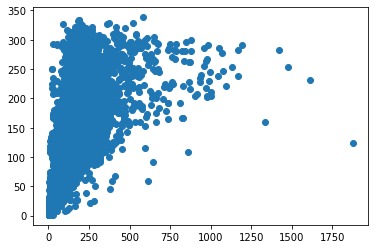

In [8]:
#Ans5 
import matplotlib.pyplot as plt

lst = rank_plot.plot_WTA_vs_WbW(tennis_list)
WTA = lst[0]
WbW = lst[1]
plot = plt.scatter(WTA, WbW)

print(' In this plot, we observe that as WTA rankings increase, so do WbW rankings -- for values', '\n', 'less than 400. After that we start observing some anomalies, it seems that our WbW ranking does not go beyond 400,', '\n', 'whereas WTA rankings can be as large as 1000')

---

### Evaluation

| Aspect  | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   /15    |      
| 2       |   /5     |   
| 3       |   /10    | 
| 4       |   /10    | 
| 5       |   /10     | 
| Legibility     |   /10    | 
| Modularity     |   /10    | 
| Optimization   |   /30    | 
|**Total**|  **/100**  | 
